In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=(~newMask)&(cpx_Glass['P_kbar_x']<17)
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)
Cpx_Glass_plot=Cpx_Glass.loc[Press_new]

C:\Users\penny\AppData\Local\Temp\ipykernel_29300\2399955686.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


In [4]:
len(Cpx_Glass_plot)

543

## Proportion different filters discard

In [5]:
# This is using FeT in both Liq and Cpx
eq_tests_FeT=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, 
                                        Fe3Fet_Liq=0, T=Cpx_Glass['T_K_x'],
                                            P=Cpx_Glass['P_kbar_x'])

Diff_Fet=np.abs(eq_tests_FeT['Kd_Ideal_Put'].loc[Press_new]-
         eq_tests_FeT['Kd_Fe_Mg_Fe2'].loc[Press_new])
print('proportion outside at 0.03')
print(1-sum(Diff_Fet<=0.03)/len(eq_tests_FeT['Kd_Ideal_Put'].loc[Press_new]))
print('proportion outside at 0.08')
print(1-sum(Diff_Fet<=0.08)/len(eq_tests_FeT['Kd_Ideal_Put'].loc[Press_new]))
      

c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


proportion outside at 0.03
0.6574585635359116
proportion outside at 0.08
0.22651933701657456


In [20]:
## PRoprtion without H2O
sum(Cpx_Glass_plot['H2O_Liq']>0)/sum(Cpx_Glass_plot['H2O_Liq'])

0.2183908020234397

## Calculating fo2

In [5]:
# Calculating Fe3/FeT using Kress from fo2
myLiquids_Fe3_Kress=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1,
                                                   T_K=Cpx_Glass['T_K_x'], 
                                          P_kbar=Cpx_Glass['P_kbar_x'], 
                                                   fo2=10**(Cpx_Glass['logfo2']), 
                                                   model="Kress1991", 
                                                   renorm=True)

# Calculating Fe3/FeT using Putirka from fo2
myLiquids_Fe3_Put=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1,
                                                 T_K=Cpx_Glass['T_K_x'], 
                                          P_kbar=Cpx_Glass['P_kbar_x'], 
                                                 fo2=10**(Cpx_Glass['logfo2']),
                                                 model="Put2016_eq6b", renorm=False)

# Calculating Eq tests (e.g. Kd) using only Kress Fe2 in Liq
comps_Fe3_Kress=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, 
                                              cpx_comps=myCpxs1, 
                                Fe3Fet_Liq=myLiquids_Fe3_Kress['Fe3Fet_Liq'], 
                             T=Cpx_Glass['T_K_x'], P=Cpx_Glass['P_kbar_x'])

# Calculating Eq tests (e.g. Kd) using only Putirka Fe2 in Liq
comps_Fe3_Put=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, 
                                                       Fe3Fet_Liq=myLiquids_Fe3_Kress['Fe3Fet_Liq'], T=Cpx_Glass['T_K_x'],
                                            P=Cpx_Glass['P_kbar_x'])





C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## Kd Fe-Mg and redox

In [11]:
Cpx_Glass_Filt=Cpx_Glass.loc[(Cpx_Glass['logfo2'].between(-100, -1))&(Press_new)]
comps_Fe3_Kress_Filt=comps_Fe3_Kress.loc[(Cpx_Glass['logfo2'].between(-100, -1))&(Press_new)]
comps_Fe3_Kress_Filt=comps_Fe3_Kress.loc[(Cpx_Glass['logfo2'].between(-100, -1))&(Press_new)]



In [12]:
Diff=(comps_Fe3_Kress_Filt['Kd_Ideal_Put']
     -comps_Fe3_Kress_Filt['Kd_Fe_Mg_Fe2'])

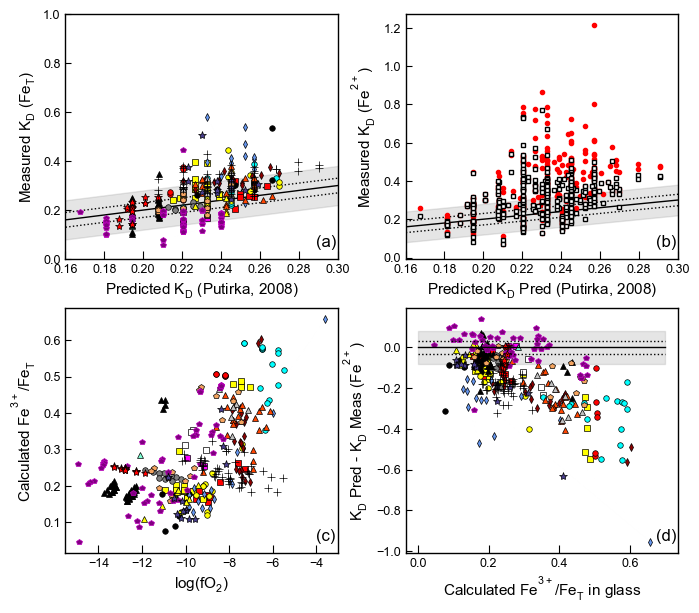

In [18]:
fig, ((ax1, ax2),  (ax3, ax4)) = plt.subplots(2, 2, figsize = (7.9,7))

a=1
minx=0.13
maxx=0.33
################# Plotting using Fetotal ###############
ax1.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)
ax1.plot([minx, maxx],[minx+0.03, maxx+0.03],
                 ':k', lw=1)
ax1.plot([minx, maxx],[minx-0.03, maxx-0.03],
                 ':k', lw=1)
ax1.fill_between([minx, maxx],[minx+0.08, maxx+0.08], [minx-0.08, maxx-0.08],
                 color='grey', alpha=0.2)

ax1.set_xlabel('Predicted K$_{D}$ (Putirka, 2008)')
ax1.set_ylabel('Measured K$_{D}$ (Fe$_T$)')

############################# Plotting using Fe3+ and in Cpx #########
ax1.set_ylim([0, 1])
ax2.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)
ax2.fill_between([minx, maxx],[minx+0.08, maxx+0.08], [minx-0.08, maxx-0.08],
                 color='grey', alpha=0.2)
ax2.plot([minx, maxx],[minx+0.03, maxx+0.03],
                 ':k', lw=1)
ax2.plot([minx, maxx],[minx-0.03, maxx-0.03],
                 ':k', lw=1)

# Using Fe2 in just the liquid
ax2.plot(comps_Fe3_Kress['Kd_Ideal_Put'].loc[((Cpx_Glass['logfo2']!=0)&Press_new)], 
         comps_Fe3_Kress['Kd_Fe_Mg_Fe2'].loc[((Cpx_Glass['logfo2']!=0)&Press_new)], 
         '.r', label='Fe2 in Liq')
# Using Fe2 in the Cpx as well
ax2.plot(comps_Fe3_Kress['Kd_Ideal_Put'].loc[((Cpx_Glass['logfo2']!=0)&Press_new)], 
         comps_Fe3_Kress['Kd_Fe_Mg_Fe2_Lind'].loc[((Cpx_Glass['logfo2']!=0)&Press_new)],
         'sk', mfc='white', ms=3, label='Fe2 Liq + Cpx')

#ax2.legend()
ax2.set_xlabel('Predicted K$_{D}$ Pred (Putirka, 2008)')
ax2.set_ylabel('Measured K$_{D}$ (Fe$^{2+}$)')

############################ Showing by experiment



face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'green', 'green')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '+')
nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6, 6, 6)







Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:
    
    # Using Fetotal for both Cpx and Liq
    ax1.plot(eq_tests_FeT['Kd_Ideal_Put'].loc[Press_new&(Cpx_Glass_Filt['Citation_x']==ref)], 
         eq_tests_FeT['Kd_Fe_Mg_Fe2'].loc[Press_new&(Cpx_Glass_Filt['Citation_x']==ref)], 
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
    
    
    ax3.plot(Cpx_Glass_Filt['logfo2'].loc[Cpx_Glass_Filt['Citation_x']==ref], 
         comps_Fe3_Kress_Filt['Fe3Fet_Liq'].loc[Cpx_Glass_Filt['Citation_x']==ref], 
                marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )



    ax4.plot(comps_Fe3_Kress_Filt['Fe3Fet_Liq'].loc[Cpx_Glass_Filt['Citation_x']==ref], 
         Diff.loc[Cpx_Glass_Filt['Citation_x']==ref], 
                marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    
    ncolor+=1
    nmarkers+=1        
ax3.set_xlabel('log(fO$_2$)')
ax3.set_ylabel('Calculated Fe$^{3+}$/Fe$_T$')


###### Difference in KDs



ax4.fill_between([0, 0.7],[-0.08, -0.08], [0.08, 0.08],
                 color='grey', alpha=0.2)
ax4.plot([0, 0.7], [0, 0], '-k', lw=a)
ax4.plot([0, 0.7], [0.03, 0.03], ':k', lw=a)
ax4.plot([0, 0.7], [-0.03, -0.03], ':k', lw=a)
ax4.set_xlabel('Calculated Fe$^{3+}$/Fe$_T$ in glass')
ax4.set_ylabel('K$_{D}$ Pred - K$_{D}$ Meas (Fe$^{2+}$)')
#ax3.legend()

################################################33333
ax1.annotate("(a)", xy=(0.92, 0.05), xycoords="axes fraction", fontsize=12)
ax2.annotate("(b)", xy=(0.92, 0.05), xycoords="axes fraction", fontsize=12)
ax3.annotate("(c)", xy=(0.92, 0.05), xycoords="axes fraction", fontsize=12)
ax4.annotate("(d)", xy=(0.92, 0.05), xycoords="axes fraction", fontsize=12)

ax1.set_xlim([0.16, 0.3])
ax2.set_xlim([0.16, 0.3])
plt.subplots_adjust(wspace=0.25)

fig.savefig('Cpx_Liq_Kd_Test.png', dpi=300)




## Same figure but showing wood and blundy

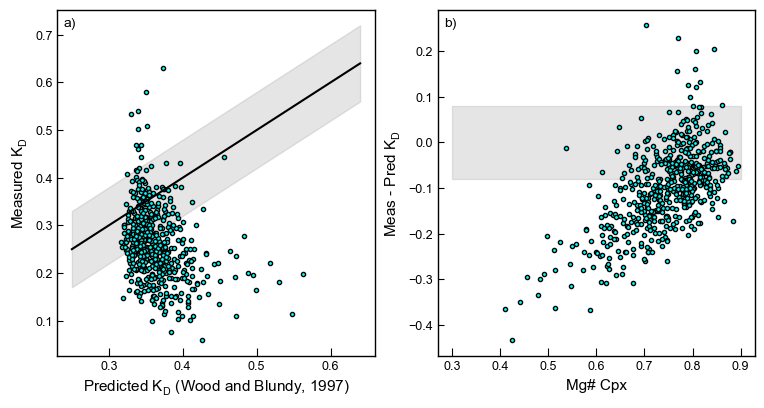

In [23]:
Cpx_Glass['KD_Wood']=0.109+0.186/comps_Fe3_Kress['Mgno_Cpx']

minx=0.25
maxx=0.64
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4.5))
ax1.plot(
        
    Cpx_Glass['KD_Wood'].loc[Press_new],
     eq_tests_FeT['Kd_Fe_Mg_Fe2'].loc[Press_new],
    'ok', mfc='cyan', ms=3)
ax2.fill_between([0.3, 0.9],[-0.08, -0.08], [0.08, 0.08],
                 color='grey', alpha=0.2)    
ax1.set_ylabel('Measured K$_D$')
ax1.set_xlabel('Predicted K$_D$ (Wood and Blundy, 1997)')
ax2.set_xlabel('Mg# Cpx')
ax2.set_ylabel('Meas - Pred K$_D$')
ax2.plot(comps_Fe3_Kress['Mgno_Cpx'].loc[Press_new],
         eq_tests_FeT['Kd_Fe_Mg_Fe2'].loc[Press_new]-Cpx_Glass['KD_Wood'].loc[Press_new],
         
        'ok', mfc='cyan', ms=3)
ax1.fill_between([minx, maxx],[minx+0.08, maxx+0.08], [minx-0.08, maxx-0.08],
                 color='grey', alpha=0.2)
ax1.plot([0.25, maxx], [0.25, maxx], '-k')
ax1.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction",  fontsize=10)
ax2.annotate("b)", xy=(0.02, 0.95), xycoords="axes fraction",  fontsize=10)

fig.savefig('BlundyWood_KD.png', dpi=300)

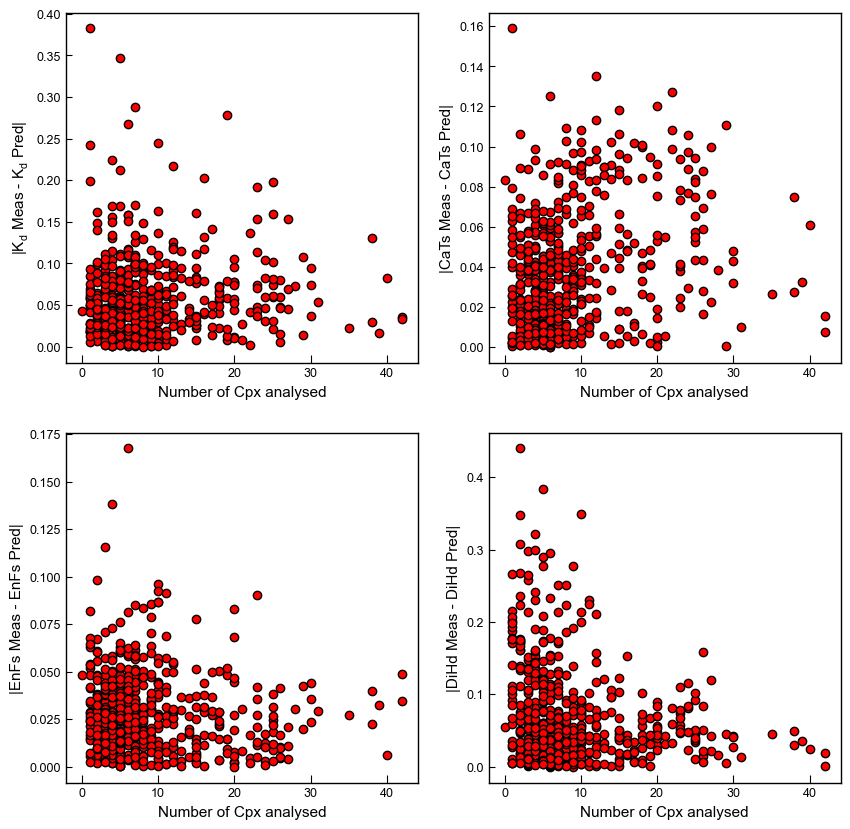

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.plot(cpx_Glass['N_meas_Cpx'].loc[Press_new],
    np.abs(eq_tests_FeT['Kd_Ideal_Put'].loc[Press_new]- 
         eq_tests_FeT['Kd_Fe_Mg_Fe2'].loc[Press_new]),
         'ok', mfc='red')
ax1.set_xlabel('Number of Cpx analysed')
ax1.set_ylabel('|K$_d$ Meas - K$_d$ Pred|')
        
         
ax2.plot(cpx_Glass['N_meas_Cpx'].loc[Press_new],
    np.abs(eq_tests_FeT['CaTs_Pred_Put1999'].loc[Press_new]- 
         eq_tests_FeT['CaTs'].loc[Press_new]),
         'ok', mfc='red')
ax2.set_xlabel('Number of Cpx analysed')
ax2.set_ylabel('|CaTs Meas - CaTs Pred|')
  
ax3.plot(cpx_Glass['N_meas_Cpx'].loc[Press_new],
    np.abs(eq_tests_FeT['EnFs_Pred_Mollo13'].loc[Press_new]- 
         eq_tests_FeT['EnFs'].loc[Press_new]),
         'ok', mfc='red')
ax3.set_xlabel('Number of Cpx analysed')
ax3.set_ylabel('|EnFs Meas - EnFs Pred|')
 
    
ax4.plot(cpx_Glass['N_meas_Cpx'].loc[Press_new],
    np.abs(eq_tests_FeT['DiHd_Pred_Mollo13'].loc[Press_new]- 
         eq_tests_FeT['DiHd_1996'].loc[Press_new]),
         'ok', mfc='red')
ax4.set_xlabel('Number of Cpx analysed')
ax4.set_ylabel('|DiHd Meas - DiHd Pred|')
fig.savefig('Numbervseqtests.png', dpi=200)